In [2]:
#https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296
import numpy as np
import matplotlib.pyplot as plt
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [3]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

(0, 200)

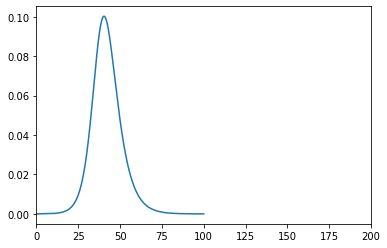

In [4]:
plt.plot(t,results[:,2])
plt.xlim(0,200)

In [5]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [9]:
# Define parameters
t_max = 500
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho=.5
rho1 = 1
rho2 = .8
params = alpha, beta, gamma,rho
params2 = alpha, beta, gamma,rho1
params3 = alpha, beta, gamma,rho2

# Run simulation
results = seir_model_with_soc_dist(init_vals, params, t)
results2 = seir_model_with_soc_dist(init_vals, params2, t)
results3 = seir_model_with_soc_dist(init_vals, params3, t)

(0, 500)

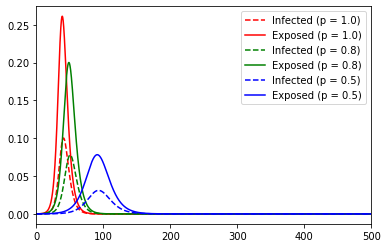

In [10]:
plt.plot(t,results2[:,2],"r--",label = 'Infected (p = 1.0)')
plt.plot(t,results2[:,1],"r-",label = 'Exposed (p = 1.0)')
plt.plot(t,results3[:,2],"g--",label = 'Infected (p = 0.8)')
plt.plot(t,results3[:,1],"g-",label = 'Exposed (p = 0.8)')
plt.plot(t,results[:,2],"b--",label = 'Infected (p = 0.5)')
plt.plot(t,results[:,1],"b-",label = 'Exposed (p = 0.5)')
plt.legend()
plt.xlim(0,500)

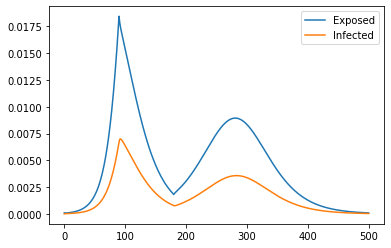

In [11]:
def seir_model_with_season(init_vals, params, t, betasummer,betaspring):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        if abs(360-_)<=90:
            next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
            next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
            next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
            next_R = R[-1] + (gamma*I[-1])*dt
        elif 90<abs(360-_)<=180:
            beta = betaspring
            next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
            next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
            next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
            next_R = R[-1] + (gamma*I[-1])*dt
        elif 180<abs(360-_)<=270:
            beta = betasummer
            next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
            next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
            next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
            next_R = R[-1] + (gamma*I[-1])*dt
        elif 270<abs(360-_)<=360:
            beta = betaspring
            next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
            next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
            next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
            next_R = R[-1] + (gamma*I[-1])*dt    
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

betaspring = 1.5
betasummer = 1
newresults = seir_model_with_season(init_vals, params, t, betasummer,betaspring)
plt.plot(t,newresults[:,1],label = 'Exposed')
plt.plot(t,newresults[:,2], label = 'Infected')
plt.legend()
plt.show()

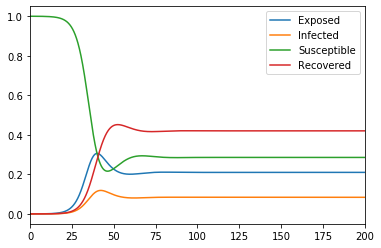

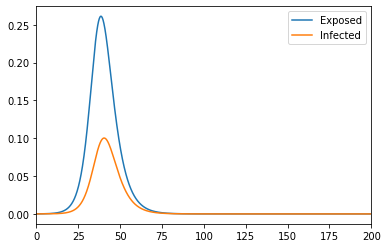

In [23]:
def seir_model_with_temp(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho, epsilon = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt + (epsilon*R[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt - (epsilon*R[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

epsilon = .1
rho3 = 1
params4 = alpha, beta, gamma, rho3, epsilon
tempresults = seir_model_with_temp(init_vals, params4, t)
plt.plot(t,tempresults[:,1],label = 'Exposed')
plt.plot(t,tempresults[:,2], label = 'Infected')
plt.plot(t,tempresults[:,0], label = 'Susceptible')
plt.plot(t,tempresults[:,3], label = 'Recovered')
plt.xlim(0,200)
plt.legend()
plt.show()
epsilon2 = 0
params5 = alpha, beta, gamma, rho3, epsilon2
tempresults2 = seir_model_with_temp(init_vals, params5, t)
plt.plot(t,tempresults2[:,1],label = 'Exposed')
plt.plot(t,tempresults2[:,2], label = 'Infected')
plt.xlim(0,200)
plt.legend()
plt.show()